In [1]:
from Application.PaparaziGame import PaparaziGame
from Application.plot_map import plot_map
import pandas as pd

In [2]:
game = PaparaziGame()

Testmap_weighted_50
Testmap_weighted_100
Testmap_weighted_25
Testmap_weighted_200
Started Testmap_weighted_50 with None heuristic
Finished Testmap_weighted_50 with None heuristic in 106 iterations and 13012.93ms


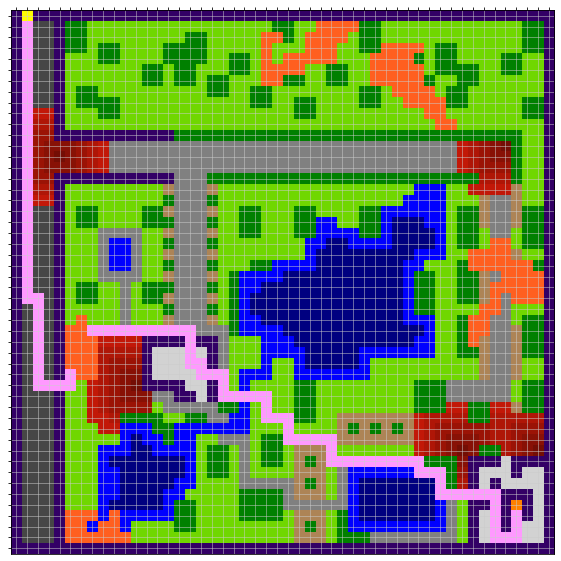

Started Testmap_weighted_100 with None heuristic
Finished Testmap_weighted_100 with None heuristic in 258 iterations and 422171.94ms


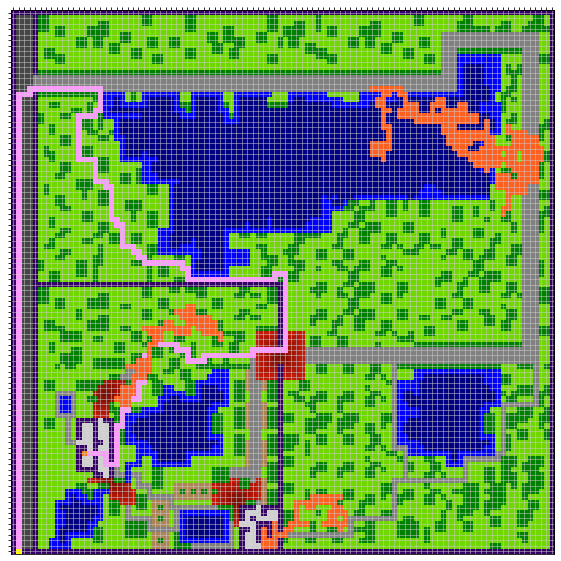

Started Testmap_weighted_25 with None heuristic
Finished Testmap_weighted_25 with None heuristic in 130 iterations and 2158.76ms


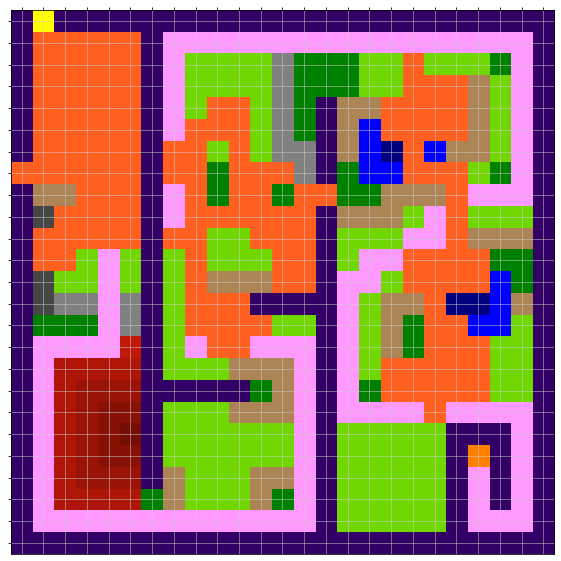

Started Testmap_weighted_200 with None heuristic
Running longer than 15min currently at iteration 46
Weight 191 not found!
Weight 282 not found!


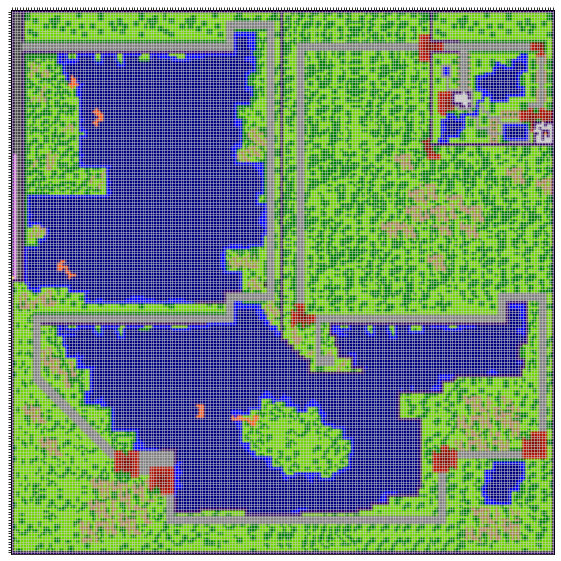

In [ ]:
game_map = game.play("Maps/",5)

In [ ]:
columns=['uuid', 'time_elapsed', 'total_iteration', 'total_cost', 'path_length', 'heuristic', 'map','path']
df = pd.DataFrame([[getattr(i,j) for j in columns] for i in game_map], columns=columns)

In [ ]:
df

In [ ]:
df.groupby('heuristic')[['total_cost', 'time_elapsed']].min()

In [ ]:
def find_best_result(df, heuristic):
    results = df[df['heuristic'] == heuristic]
    return results[results['total_cost'] == results['total_cost'].min()].sort_values(by=['time_elapsed']).iloc[0]

In [ ]:
for heuristic in ['None', "Manhattan", "Euclidean", "Chebyshev"]:
    best_manhattan = find_best_result(df,heuristic)
    manhattan_map = plot_map(best_manhattan['map'], best_manhattan['path'])